In [1]:
%matplotlib inline
import cv2
import numpy as np
# for i in range(1, 1965):
#     example(i)

In [2]:

# filename = 'C:\\Users\\sohil\\Desktop\\c.png'

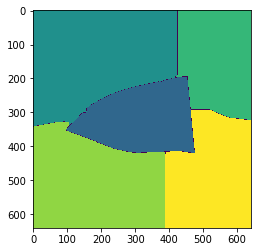

In [3]:
from matplotlib import pyplot as plt
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers )



In [4]:
ret

5

### gaussian blurring

In [5]:
# img = cv2.imread(filename)
# gausBlur = cv2.GaussianBlur(img, (11,11),9) 

# #imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# ret,thresh = cv2.threshold(gausBlur,100,200,0)
# im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CV_8UC1)
# cv2.drawContours(img, contours, -1, (0,255,0), 3)


# plt.subplot(121),
# cv2.imshow('label', gausBlur)
# cv2.waitKey(0)
# plt.imshow(img, cmap='gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(gausBlur)
# plt.title('Blurred Image'), plt.xticks([]), plt.yticks([])

In [6]:
# '''
#  * Python program to use contours to count the objects in an image.
#  *
#  * usage: python Contours.py <filename> <threshold>
# '''
# import cv2
# import sys

# # read command-line arguments
# filename='../example_output/extract_field1857.jpg'
# t = 75
# # read original image
# img = cv2.imread(filename)

# # create binary image
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (9, 9), 7)
# t, binary = cv2.threshold(blur, t, 255, cv2.THRESH_BINARY)

# # find contours
# (_, contours, _) = cv2.findContours(binary, cv2.RETR_LIST , 
#     cv2.CHAIN_APPROX_SIMPLE)

# # print table of contours and sizes
# print("Found %d objects." % len(contours))
# for (i, c) in enumerate(contours):
#     print("\tSize of contour %d: %d" % (i, len(c)))

# # draw contours over original image
# cv2.drawContours(img, contours, -1, (0, 0, 255), 5)

# # display original image with contours
# cv2.namedWindow("output", cv2.WINDOW_NORMAL)
# cv2.imshow("output", img)
# cv2.waitKey(0)

### Hough

In [7]:
# img = gausBlur#cv2.imread(filename)
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(gray,50,150,apertureSize = 3)

# minLineLength = 50
# maxLineGap = 10
# lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
# for x1,y1,x2,y2 in lines[0]:
#     cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

# # plt.imshow(img)
# cv2.imshow('HoughLines', img)

In [40]:
'''
*  Widen the edges by making neighborhood of the white pixels white pixels also
*  input: 2D numpy array (black and white values)
*  output: 2D numpy array with thick edges
'''
def wideEges(edges, pixelsNum = 3):
    i = 0
    while i < edges.shape[0]:
        j = 0
        while j < edges.shape[1]:
            if edges[i,j] > 0 and edges.shape[0] > i >=0  and edges.shape[1]-(pixelsNum + 1) > j >= pixelsNum:
                edges[i, j-pixelsNum: j+pixelsNum] = 255
                j += pixelsNum + 1
            else:
                j += 1
        i+=1
    return edges

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import sys
import os

# define input and outputFolder
inputFolder='../example_output'
noisyFolder='NoisyData/'

# Create directory
try:
    # Create target Directory
    os.mkdir(noisyFolder)
    print("Directory " , noisyFolder ,  " Created ") 
except FileExistsError:
    print("Directory " , noisyFolder ,  " already exists")

imgsCount = 5
for i in range(1, imgsCount):
    print(">> Image %d ..." % i)
    filename = inputFolder + '/extract_field%d.jpg' % i
    
    # Edge Detection on Filtered Image
    orgImg = cv2.imread(filename)
    img = cv2.pyrMeanShiftFiltering(orgImg, 30, 51)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,50,150, apertureSize = 3, L2gradient = True)
    
    # widen the edges
    edges = wideEges(edges, 5)
    
    
    # Threshold for contours
    t = 25

    # convert edges to black
    img[edges > 0] = 0 

    # create binary image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 7)
    t, binary = cv2.threshold(blur, t, 255, cv2.THRESH_BINARY)

    # find contours
    (_, contours, _) = cv2.findContours(binary, cv2.RETR_LIST , 
        cv2.CHAIN_APPROX_SIMPLE)

    # print table of contours and sizes
    print("Found %d objects." % len(contours))
    #for (i, c) in enumerate(contours):
    #    print("\tSize of contour %d: %d" % (i, len(c)))

    # draw contours over original image
    contouredImg = np.copy(img)
    cv2.drawContours(contouredImg, contours, -1, (0, 0, 255), 5)

    # concatinate orginal image with the contoured one
    finalImg = np.concatenate((orgImg, 
                              np.full((img.shape[0], 1, img.shape[2]), 255),
                              contouredImg), 
                             axis = 1)

    if len(contours) > 1:
        # save to noisy folder
        cv2.imwrite(noisyFolder + "%d.jpg" % i, finalImg)


    
            
# cv2.imshow('sad', edges)
# cv2.waitKey(0)


Directory  NoisyData/  already exists
>> Image 1 ...
Found 1 objects.
>> Image 2 ...
Found 1 objects.
>> Image 3 ...
Found 1 objects.
>> Image 4 ...
Found 1 objects.


In [32]:
'''
 * Python program to use contours to count the objects in an image.
'''


# filename='../example_output/extract_field1857.jpg'

# display original image with contours
# cv2.namedWindow("output", cv2.WINDOW_NORMAL)
# cv2.imshow("output", img)
# cv2.waitKey(0)

Found 2 objects.
	Size of contour 0: 334
	Size of contour 1: 146


True

2